In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pandas DataFrame

In [2]:
# Read CSV file and create a Pandas dataframe
df = pd.read_csv("Resources/COVID19_data.csv")

In [3]:
# View first 5 rows and column headers of new dataframe
df.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of Mentions,Flag
0,12/6/20,2/1/20,12/5/20,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,175,NaN
1,12/6/20,2/1/20,12/5/20,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,853,NaN
2,12/6/20,2/1/20,12/5/20,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"2,174",NaN
3,12/6/20,2/1/20,12/5/20,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"6,220",NaN
4,12/6/20,2/1/20,12/5/20,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"15,295",NaN


In [4]:
# Change column heading "Number of Mentions" to "Total_Deaths" so it's more understandable
df.rename(columns={"Number of Mentions":"Total_Deaths"}, inplace=True)

In [5]:
# Convert "Total_Deaths" column to float (for later aggregating)
df["Total_Deaths"] = df["Total_Deaths"].str.replace(",", "").astype(float)

In [6]:
# Groupby "Total_Deaths" to find total for each condition
df = df.groupby("Condition").Total_Deaths.sum().reset_index()

In [7]:
# Rank totals deaths in descending order
df = df.sort_values("Total_Deaths", ascending=False, ignore_index=True)

In [8]:
# Display top 5 conditions in order
df.head()

,Condition,Total_Deaths
0,COVID-19,1023798.0
1,All other conditions and causes (residual),542398.0
2,Influenza and pneumonia,444806.0
3,Respiratory failure,363520.0
4,Hypertensive diseases,216249.0


In [9]:
# Drop first two rows/conditions of dataframe ("COVID-19" and "All other conditions and causes") - not helpful for analyzing conditionss
# Reset index
df = df.drop([df.index[0], df.index[1]]).reset_index(drop=True)
df.head()

,Condition,Total_Deaths
0,Influenza and pneumonia,444806.0
1,Respiratory failure,363520.0
2,Hypertensive diseases,216249.0
3,Diabetes,166519.0
4,Adult respiratory distress syndrome,124145.0


In [10]:
# Make index start with 1 (so that output df will display ranking number next to each condition)
df.index = df.index + 1

### Top 10 Underlying Conditions:

In [11]:
# Display top 10 underlying conditions
df.head(10)

,Condition,Total_Deaths
1,Influenza and pneumonia,444806.0
2,Respiratory failure,363520.0
3,Hypertensive diseases,216249.0
4,Diabetes,166519.0
5,Adult respiratory distress syndrome,124145.0
6,Cardiac arrest,118005.0
7,Ischemic heart disease,117812.0
8,Vascular and unspecified dementia,114495.0
9,Sepsis,95365.0
10,Renal failure,92654.0


# Matplotlib Pie Chart

In [12]:
#  Isolate the top 5 conditions to use for pie chart
top5 = df.iloc[0:5]

In [13]:
# Save NAMES for each of the top 5 conditions
names_top5 = top5["Condition"]

In [14]:
# Save TOTALS for each of the top 5 conditions
totals_top5 = top5["Total_Deaths"]

In [15]:
# Convert "Total" column to integer for pie chart calculatons
df["Total_Deaths"] = df["Total_Deaths"].astype(int)

In [16]:
# Esthetics
colors = ["lightcoral", "gold", "lightskyblue", "red", "green"]
explode = (0.1, 0, 0)

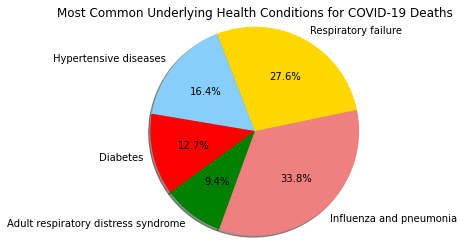

In [17]:
#  Create pie chart
plt.pie(totals_top5, labels=names_top5, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250, radius=1.2)

# Chart title
plt.title("Most Common Underlying Health Conditions for COVID-19 Deaths")

# Show chart
plt.show()